# 2.0 DATA UNDERSTANDING STAGE

### 2.1 libraries

##### 2.1 -1 Install required libraries 

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install requests
# !pip install matplotlib

##### 2.1 -2 Import Required libraries

In [1]:
import numpy as np
import pandas as pd
import requests
import zipfile
from io import BytesIO
import matplotlib as plt
from sklearn.model_selection import train_test_split

import plotly.graph_objs as go # bar and pie charts, Plotly
import plotly

## 2.2 Importing data

#### 2.2 -1 retrieving data

In [3]:
# URL of the zipped folder
url = "https://archive.ics.uci.edu/static/public/179/secom.zip"

# download the zipped folder using request library
zip_file = requests.get(url)

# opening the zipped folder
secom_files =  zipfile.ZipFile(BytesIO(zip_file.content), 'r')

# printing the file names inside the zip
secom_files_names =  (zipfile.ZipFile(BytesIO(zip_file.content))).namelist()
print(secom_files_names)

['secom.data', 'secom.names', 'secom_labels.data']


In [4]:
# reading the relevant files 

f_file = secom_files.open('secom.data')
l_file = secom_files.open('secom_labels.data')
n_file = secom_files.open('secom.names')


#### 2.2 -2 labels data

In [5]:
#Create column names and pandas dataframes for labels data

l_column_names=['classifications', 'date_time'] #### create column labels

labels_df = pd.read_csv(l_file, sep=r'\s+', header=None, names= l_column_names)

print(f"Dimensions of Labels data: ", labels_df.shape)

print(labels_df.head(5))

Dimensions of Labels data:  (1567, 2)
   classifications            date_time
0               -1  19/07/2008 11:55:00
1               -1  19/07/2008 12:32:00
2                1  19/07/2008 13:17:00
3               -1  19/07/2008 14:43:00
4               -1  19/07/2008 15:22:00


In [19]:
labels_df.isna().sum()

classifications    0
date_time          0
dtype: int64

##### 2.2 -2-1 timestamps & checking its chronological order (from oldest to newest)


In [52]:
print(labels_df.tail(5))

      classifications            date_time
1562               -1  16/10/2008 15:13:00
1563               -1  16/10/2008 20:49:00
1564               -1  17/10/2008 05:26:00
1565               -1  17/10/2008 06:01:00
1566               -1  17/10/2008 06:07:00


In [53]:
labels_df['date_time'] = pd.to_datetime(labels_df['date_time'], format='%d/%m/%Y %H:%M:%S')

is_ascending = labels_df['date_time'].is_monotonic_increasing

if is_ascending:
    print("The timestamps column is in ascending (oldest to newest) order.")
else:
    print("The timestamps column is not in ascending (newest to oldest) order.")

The timestamps column is in ascending (oldest to newest) order.


##### 2.2 -2-2 Date columns separation

In [54]:
# # separating date columns 
# t_df = labels_df.copy()
# t_df["time"] = t_df["date_time"].dt.time
# t_df["date"] = pd.to_datetime(t_df["date_time"].dt.date)
# t_df["year"] = t_df["date"].dt.year
# t_df["month"] = t_df["date"].dt.month
# t_df["day"] = t_df["date"].dt.day

# t_df

### checking the test result

In [8]:
result_fail = labels_df[labels_df['classifications'] != -1]
result_pass = labels_df[labels_df['classifications'] == -1]

print(f"The number of failure: {len(result_fail)} \nThe number of pass:    {len(result_pass)}")

trace = go.Bar(x = (len(result_fail), len(result_pass)), y = ['Fail', 'Pass'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'green', 'blue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of target variable for faile and pass data')
                    
fig = dict(data = [trace], layout=layout)
plotly.offline.iplot(fig)

The number of failure: 104 
The number of pass:    1463


In [11]:
# # splitting the original data between test and training data

# train_data, test_data = train_test_split(labels_df, test_size=0.2, random_state=42)
# display(len(train_data))
# display(len(test_data))

1253

314

In [12]:
# test_percentage = len(test_data)/len(train_data)
# test_percentage

0.25059856344772546

#### 2.2 -3 SECOM.data / features data

In [7]:
f_column_names = [f"feature_{i}" for i in range(1, 592)]

secom_features_df = pd.read_csv(f_file, sep=r'\s+', header=None, names= f_column_names)
print(f"Dimensions of Features' data: ", secom_features_df.shape)
print("---------------------------------------------------------")
print(secom_features_df.head())

Dimensions of Features' data:  (1567, 591)
---------------------------------------------------------
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0   
3    2988.72    2479.90  2199.0333   909.7926     1.3204      100.0   
4    3032.24    2502.87  2233.3667  1326.5200     1.5334      100.0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_582  feature_583  \
0    97.6133     0.1242     1.5005      0.0162  ...          NaN       0.5005   
1   102.3433     0.1247     1.4966     -0.0005  ...     208.2045       0.5019   
2    95.4878     0.1241     1.4436      0.0041  ...      82.8602       0.4958   
3   104.2367     0.1217     1.4882     -0.0124  ...      73.8432       0.4990   
4   100.3967     0.1235     1.5031     -0.0031  ...          NaN   

In [8]:
features_df = secom_features_df.copy()
features_df["Missing Value"] = features_df.isna().sum()
features_df["Missing Value"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1562   NaN
1563   NaN
1564   NaN
1565   NaN
1566   NaN
Name: Missing Value, Length: 1567, dtype: float64

In [74]:
features_df = secom_features_df.copy()
features_df.isna().sum()

features_df.describe().describe()



,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,feature_591
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.0
mean,2472.883085,2078.990367,1844.894221,1383.052958,341.578857,269.125000,271.969040,194.828335,196.721732,195.629009,...,221.971636,196.123947,195.819625,195.765571,210.188236,195.772655,195.769260,195.756506,340.985698,0.0
std,1109.001613,891.252031,770.362628,1096.086719,623.789231,519.942699,518.874817,550.804533,552.868134,553.309437,...,285.247330,553.513539,553.636501,553.658319,548.873105,553.655457,553.656828,553.661981,548.355979,NaN
min,73.621787,80.407705,29.513152,0.000000,0.681500,0.000000,6.237214,0.000000,0.073897,-0.053400,...,0.000000,0.003404,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.0
25%,2447.680000,2009.062500,1933.745000,921.829760,1.242025,100.000000,93.972775,0.093065,1.356150,-0.003675,...,65.762900,0.492875,0.013250,0.003475,2.644862,0.013158,0.010152,0.003192,65.017525,0.0
50%,2988.875000,2474.048865,2190.795859,1340.795514,2.861357,100.000000,101.312554,0.122111,1.462231,0.003779,...,92.727670,0.500148,0.015909,0.003783,3.181501,0.020979,0.015637,0.004942,96.780993,0.0
75%,3025.002172,2509.259375,2205.313900,1562.555875,320.900805,100.000000,110.753075,0.125000,1.551775,0.030062,...,241.904362,0.504231,0.132035,0.029200,27.509325,0.046400,0.035200,0.011950,270.388475,0.0
max,3356.350000,2846.440000,2315.266700,3715.041700,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,...,737.304800,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,0.0


# 3.0 DATA PREPARATION

#### 3.1 Merge the Features and Labels data frames

In [16]:
# merging 

merged_df = pd.merge(labels_df, secom_features_df, left_index=True, right_index=True)

print(f"Dimensions of merged data: ", merged_df.shape)

print(merged_df.head())


Dimensions of merged data:  (1567, 593)
   classifications           date_time  feature_1  feature_2  feature_3  \
0               -1 2008-07-19 11:55:00    3030.93    2564.00  2187.7333   
1               -1 2008-07-19 12:32:00    3095.78    2465.14  2230.4222   
2                1 2008-07-19 13:17:00    2932.61    2559.94  2186.4111   
3               -1 2008-07-19 14:43:00    2988.72    2479.90  2199.0333   
4               -1 2008-07-19 15:22:00    3032.24    2502.87  2233.3667   

   feature_4  feature_5  feature_6  feature_7  feature_8  ...  feature_582  \
0  1411.1265     1.3602      100.0    97.6133     0.1242  ...          NaN   
1  1463.6606     0.8294      100.0   102.3433     0.1247  ...     208.2045   
2  1698.0172     1.5102      100.0    95.4878     0.1241  ...      82.8602   
3   909.7926     1.3204      100.0   104.2367     0.1217  ...      73.8432   
4  1326.5200     1.5334      100.0   100.3967     0.1235  ...          NaN   

   feature_583  feature_584  feature_585

#### 3.2 splitting training and test dataset

In [17]:
# separating the merged df into pass and fail    #### preparing for constrained data splitting 

failed_chip = merged_df[merged_df["classifications"] == 1]
passed_chip = merged_df[merged_df["classifications"] == -1]

print(f"passed chips are: {len(passed_chip)} \nfailed chips are: {len(failed_chip)}")


passed chips are: 1463 
failed chips are: 104


In [18]:
# splitting the failed into 25% and 75% 

train_data_failed, test_data_failed = train_test_split(failed_chip, test_size=0.2, random_state=42)

print(f"failed chips for training are: {len(train_data_failed)} \nfailed chips for testing are:  {len(test_data_failed)}")
print(f"the percentage of the testing is {round( len(test_data_failed) / len(train_data_failed ), 4) * 100} %")

failed chips for training are: 83 
failed chips for testing are:  21
the percentage of the testing is 25.3 %


In [19]:
# splitting the passed into 25% and 75% 

train_data_passed, test_data_passed = train_test_split(passed_chip, test_size=0.2, random_state=42)

print(f"passed chips for training are: {len(train_data_passed)} \npassed chips for testing are:  {len(test_data_passed)}")
print(f"the percentage of the testing is {round( len(test_data_passed) / len(train_data_passed ), 3) * 100} %")

passed chips for training are: 1170 
passed chips for testing are:  293
the percentage of the testing is 25.0 %


In [20]:
# combining the train_failed and train_passed
training_df = pd.concat([train_data_failed, train_data_passed])
### counting the num of rows to check if it's properly combined 
print(len(training_df))
print(f"check: train_failed {len(train_data_failed)} + train_passed {len(train_data_passed)} = {len(train_data_failed) + len(train_data_passed)}")

print("---------------------------------------------------------------")

# combining the testing_failed and testing_passed  
testing_df = pd.concat([test_data_failed, test_data_passed])
### counting the num of rows to check if it's properly combined 
print(len(testing_df))
print(f"check: train_failed {len(test_data_failed)} + train_passed {len(test_data_passed)} = {len(test_data_failed) + len(test_data_passed)}")



1253
check: train_failed 83 + train_passed 1170 = 1253
---------------------------------------------------------------
314
check: train_failed 21 + train_passed 293 = 314


there are 24 columns that contain missing value


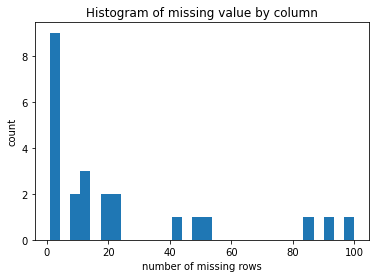

In [43]:
missing_list = secom_features_df.isnull().sum()
missing_list = missing_list.sort_values(ascending=False)
missing_count = missing_list.value_counts(dropna=False)
print(f"there are {len(missing_count)} columns that contain missing value")
plt.hist(missing_count, bins=30)
plt.title('Histogram of missing value by column')
plt.xlabel('number of missing rows')
plt.ylabel('count')
plt.show()

In [71]:
missing_df = pd.DataFrame({"counts": missing_count[:-1]})
# missing_df["num_missing_rows"] = missing_df.index
# missing_df = missing_df[["num_missing_rows", "counts"]].reset_index()
# missing_df.drop(columns=["index"])
# missing_df = missing_df[["num_missing_rows", "counts"]]
missing_df

,counts
6,100
1,92
2,84
0,52
9,48
24,43
3,24
4,24
14,20
7,20


In [36]:
missing_list.value_counts()

6       100
1        92
2        84
0        52
9        48
24       43
3        24
4        24
14       20
7        20
8        12
1018     12
260      12
273       8
51        8
12        4
10        4
1429      4
715       4
794       4
949       4
1341      4
5         3
1567      1
dtype: int64

# Histogram 

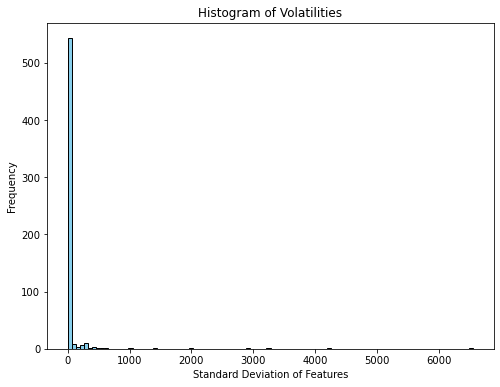

In [12]:
import matplotlib.pyplot as plt
# Calculate volatilities (standard deviations) for each column
volatilities = secom_features_df.std()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(volatilities, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Standard Deviation of Features')
plt.ylabel('Frequency')
plt.title('Histogram of Volatilities')
plt.grid(False)
plt.show()